# Chapter 1

In [1]:
import sklearn.datasets

newsgroups = sklearn.datasets.fetch_20newsgroups_vectorized()

In [2]:
X, y = newsgroups.data, newsgroups.target

In [3]:
newsgroups.data

<11314x130107 sparse matrix of type '<class 'numpy.float64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

In [4]:
newsgroups

{'data': <11314x130107 sparse matrix of type '<class 'numpy.float64'>'
 	with 1787565 stored elements in Compressed Sparse Row format>,
 'target': array([17,  7, 10, ..., 14, 12, 11]),
 'target_names': ['alt.atheism',
  'comp.graphics',
  'comp.os.ms-windows.misc',
  'comp.sys.ibm.pc.hardware',
  'comp.sys.mac.hardware',
  'comp.windows.x',
  'misc.forsale',
  'rec.autos',
  'rec.motorcycles',
  'rec.sport.baseball',
  'rec.sport.hockey',
  'sci.crypt',
  'sci.electronics',
  'sci.med',
  'sci.space',
  'soc.religion.christian',
  'talk.politics.guns',
  'talk.politics.mideast',
  'talk.politics.misc',
  'talk.religion.misc']}

In [5]:
X.shape

(11314, 130107)

In [6]:
y.shape

(11314,)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

In [8]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [9]:
y_pred = knn.predict(X)
# contains 1 entry per row of X with the prediction from the trained classifier
# Why do we use X when predicting y ????

# evaluation
knn.score(X, y)

0.9999116139296447

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
# by default the test semple is 25% of the data

In [11]:
# make sure to train the data on the training set and score on the test set

knn.fit(X_train, y_train)

knn.score(X_test, y_test)

0.662778366914104

In [12]:
#Overfitting is when the training accuracy is higher than the testing one

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [14]:
lr.fit(X_train, y_train)
lr.predict(X_test) # Why X_test ????
lr.score(X_test, y_test)

0.776599505125486

In [15]:
wine = sklearn.datasets.load_wine()

In [16]:
lr.fit(wine.data, wine.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
# Computing training accuracy which is abour 97%
lr.score(wine.data, wine.target)

0.9719101123595506

In [18]:
# We can also output confidence scores rather than 'hard' or definite predictions
lr.predict_proba(wine.data[:1])

# Here we have over 99% confidence for the 1st class and lower one for the rest.
# For e we should calculate it as 9.9*(10)^(-1) that is 99%

array([[9.95108710e-01, 4.35737706e-03, 5.33912716e-04]])

In [19]:
1/(9.9*10)

0.010101010101010102

In [20]:
# The basic SVM classifer is called LinearSVC

from sklearn.svm import LinearSVC

svm = LinearSVC()

In [21]:
svm.fit(wine.data, wine.target)
svm.score(wine.data, wine.target)

0.8089887640449438

In [22]:
# SVC fits a nonlinear SVM by default

from sklearn.svm import SVC

svm = SVC() # default hyperparameters

In [23]:
svm.fit(wine.data, wine.target)
svm.score(wine.data, wine.target)

# Here the fit is 100% which can be a sign of overfitting.
# It's a common problem we often face when using more complext ,odels like nonlinear SVM

1.0

Model complexity review:

Underfitting: model is too simple, low training accuracy

Overfitting: model is too complex, low test accuracy

LogReg and SVM are linear classifiers whih means they learn linear decision boundaries.

Classification is supervised learnin when the y-values are categories; this is in contrast with regression, where we,re trying to predict a countinues value. 

Use the ss from datacamp and this link: https://scikit-learn.org/stable/auto_examples/svm/plot_iris.html to get the plotes

# Chapter 2: Loss Functions

LogReg and Linear SVM have differenr fit f()s but the same predict f(). The differences in fit relate to loss f()s.

<p> raw model output=coefficients⋅features+intercept that is `lr.coef_ @ X[10] + lr.intercept_`
    
<p> So this i what the predict function does for any A: it computes the raw model output, checks if it's + or - and than returns a result based on the names of the classes in your dataset, e.g. 0 and 1

**Loss f()**

Many ML algorithms involve minimizing a loss, and by understanding this perspective you'll beequipped with  the tools to see connections between models, quickly grasp new ones, and start tailoring them to the data science problem. 

The loss is used to fit the model on the data, and the **score** is used to see how well we're doing.

The squared error from LinearReg is not appropriate for classification problems, as y-values are categories, not numbers. For classification a natural quantity to think abouit is the number of errors we've made. Since we'd like to make this as small as possible, the number of errors might be a good loss f().

While the 0-1 loss is important for our conceptual journey, it turns out to be very hard to minimize it directly in practice, which is  why logistic and SVMs **don't use it**.







In [24]:
from scipy.optimize import minimize

What values of my model coeff are minimizing my squared errors ????

# Chapter 3: LogReg

**Regularization**

`
lr_weak_reg = LogisticRegression(C=100)
lr_strong_reg = LogisticRegression(C=0.01)
`

The weaker is the reg, the higher is the accuracy of the model!

reg. loss =  original loss + large coeff penalty

Intuilively, without reg, we are maximizing the training accuracy -- so we do well on that matric. When we add reg, we are modifying the loss f() to penelize lager coeff, which distracts from the original goal of optimizing accuracy.

The larger is C the lower is the train acc, but higher the test one. Why?

Imagine ou didm't have access to particular feature; that's like setting the corresponding coeff to 0. Regularizing, and thus making the coeff smaller, is like compromise between not using the feature at all (setting the coeef to be 0) and fully using it (the un-regularized coeff value). 

If using a feature too heavily causing overfitting, then reg causes you  to 'fit less' and thus overfit less. #overfitting is when the train acc >> test acc # 

For linear reg we use terms Ridge and Lasso for two different types of reg.

**L1 vs. L2 regularization**
**Lasso** = linear regression with L1 regularization
**Ridge** = linear regression with L2 regularization
For other models like logistic regression we just say L1, L2, etc.

Both help reduce overfitting, and L1 also performs **feature selection**. 

`
lr_L1 = LogisticRegression(penalty='l1')
lr_L2 = LogisticRegression() # penalty='l2' by default
lr_L1.fit(X_train, y_train)
lr_L2.fit(X_train, y_train)
plt.plot(lr_L1.coef_.flatten())
plt.plot(lr_L2.coef_.flatten())
`

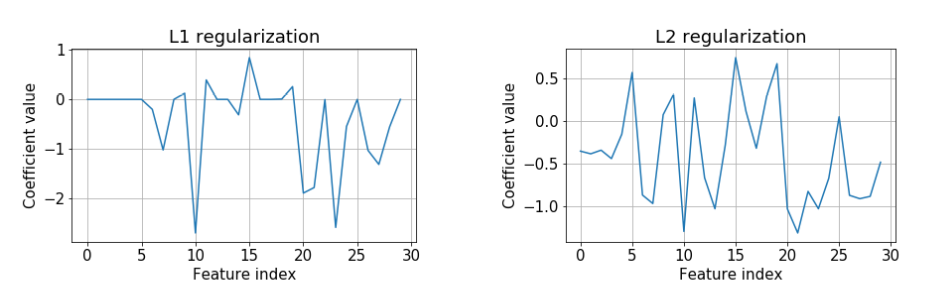

L1 set most of the features to 0 thus ignoring them. In other words, it preformed a feature selection for us.

On the other hand, L2 shrinks the coeff just to be smaller. This is analogous to what happens with Lasso and Ridge regression.



In [25]:
# Should be used for choosing the best regularization value of C

"""# Train and validaton errors initialized as empty list
train_errs = list()
valid_errs = list()

# Loop over values of C
for C_value in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C=C_value)
    lr.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errs.append( 1.0 - lr.score(X_train, y_train) )
    valid_errs.append( 1.0 - lr.score(X_valid, y_valid) )
    
# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(("train", "validation"))
plt.show()"""

'# Train and validaton errors initialized as empty list\ntrain_errs = list()\nvalid_errs = list()\n\n# Loop over values of C\nfor C_value in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:\n    # Create LogisticRegression object and fit\n    lr = LogisticRegression(C=C_value)\n    lr.fit(X_train, y_train)\n    \n    # Evaluate error rates and append to lists\n    train_errs.append( 1.0 - lr.score(X_train, y_train) )\n    valid_errs.append( 1.0 - lr.score(X_valid, y_valid) )\n    \n# Plot results\nplt.semilogx(C_values, train_errs, C_values, valid_errs)\nplt.legend(("train", "validation"))\nplt.show()'

In [26]:
# Should be used for feature selection!

"""# Specify L1 regularization
lr = LogisticRegression(penalty="l1")

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))"""

'# Specify L1 regularization\nlr = LogisticRegression(penalty="l1")\n\n# Instantiate the GridSearchCV object and run the search\nsearcher = GridSearchCV(lr, {\'C\':[0.001, 0.01, 0.1, 1, 10]})\nsearcher.fit(X_train, y_train)\n\n# Report the best parameters\nprint("Best CV params", searcher.best_params_)\n\n# Find the number of nonzero coefficients (selected features)\nbest_lr = searcher.best_estimator_\ncoefs = best_lr.coef_\nprint("Total number of features:", coefs.size)\nprint("Number of selected features:", np.count_nonzero(coefs))'

Reg not only afects the coeff, but also the orientation boundary.

**Multy-class classifier / one-vs-rest**

`
lr0.fit(X, y==0)
lr1.fit(X, y==1)
lr2.fit(X, y==2)
`

Here lr0 predicts whether the value is 0 or not 0.

In order to make predictions using one-vs-rest, we take the class whose classifier gives the largest raw model output - or `decicion_function`, in skikit-learn terminology.

We choose the one with the higher output so we have a better confidence the class is *0* than any of the other.

By default the y==0 when doing a one-vs rest LogisticClassification.

Multinomial LogReg ~~~~ softmax, cross-entropy loss

In [27]:
# Should be used for getting COEFICIENTS and INTERSEPTS of the model

"""In [1]: lr_ovr = LogisticRegression() # one-vs-rest by default

In [2]: lr_ovr.fit(X,y)

In [3]: lr_ovr.coef_.shape
Out[3]: (3,13)

In [4]: lr_ovr.intercept_.shape
Out[4]: (3,)"""

'In [1]: lr_ovr = LogisticRegression() # one-vs-rest by default\n\nIn [2]: lr_ovr.fit(X,y)\n\nIn [3]: lr_ovr.coef_.shape\nOut[3]: (3,13)\n\nIn [4]: lr_ovr.intercept_.shape\nOut[4]: (3,)'